In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [2]:
# Load dataset
df = pd.read_csv("breast-cancer.csv")

In [3]:
# --- i. Data Cleaning ---
df.replace('?', np.nan, inplace=True)
df.dropna(inplace=True)
df = df[df.select_dtypes(include=[np.number]).ge(0).all(1)]  # remove negative numbers

In [4]:
# --- j. Outlier Detection and Removal ---
# Key numeric columns for outlier detection
outlier_cols = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean']

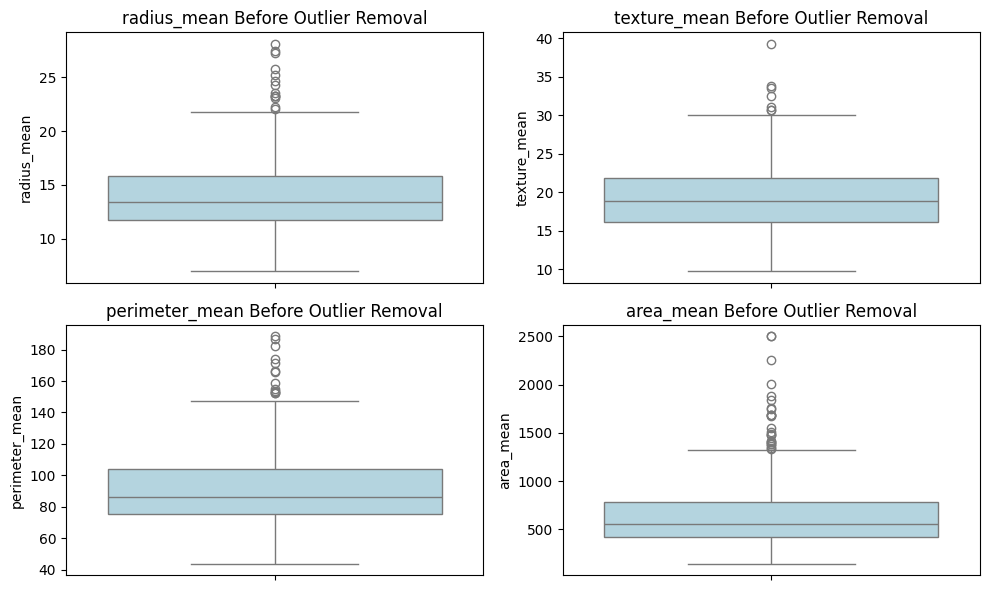

In [5]:
# Plot box plots before outlier removal
plt.figure(figsize=(10, 6))
for i, col in enumerate(outlier_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=df[col], color='lightblue')
    plt.title(f"{col} Before Outlier Removal")
plt.tight_layout()
plt.show()

In [6]:
# Remove outliers using IQR
for col in outlier_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

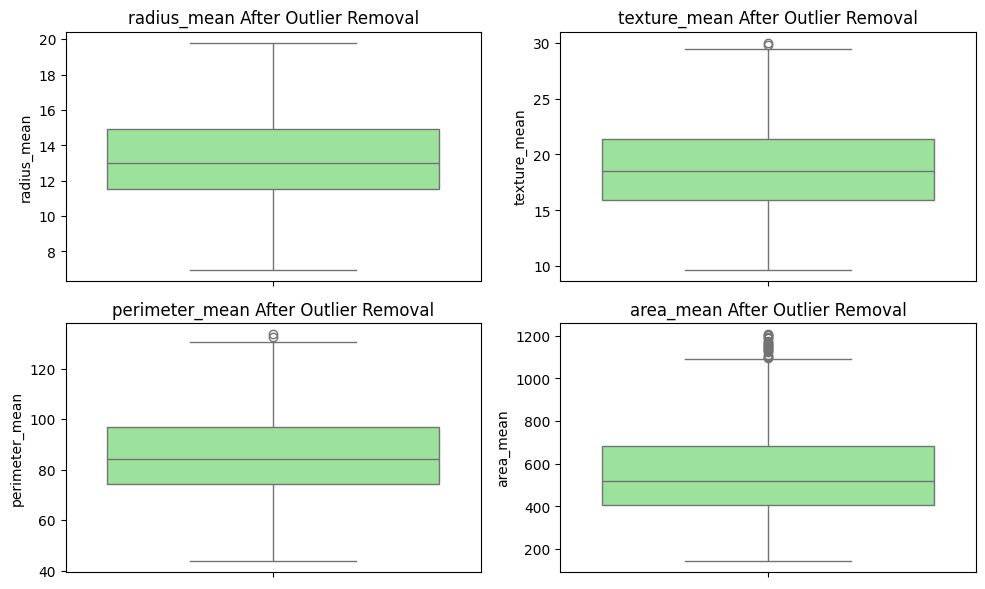

In [7]:
# Plot box plots after outlier removal
plt.figure(figsize=(10, 6))
for i, col in enumerate(outlier_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=df[col], color='lightgreen')
    plt.title(f"{col} After Outlier Removal")
plt.tight_layout()
plt.show()

In [8]:
# --- k. Data Transformation ---
df.drop('id', axis=1, inplace=True)
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})  # M = 1, B = 0
features = df.columns.drop('diagnosis')  # All columns except diagnosis
X = df[features]
y = df['diagnosis']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [9]:
# --- l. Model Building ---
# X = input features (all measurements like radius_mean, texture_mean, etc.)
# y = output target (diagnosis: 0=benign, 1=malignant)
# Split data: 80% for training (X_train, y_train), 20% for testing (X_test, y_test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [10]:
# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)  # Train model on X_train, y_train
lr_pred = lr.predict(X_test)  # Predict on X_test

In [11]:
# Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)  # Train model on X_train, y_train
nb_pred = nb.predict(X_test)  # Predict on X_test

In [12]:
# Compare accuracy
print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_pred))
print("Naive Bayes Accuracy:", accuracy_score(y_test, nb_pred))

Logistic Regression Accuracy: 0.9514563106796117
Naive Bayes Accuracy: 0.9223300970873787
